In [1]:
import pandas as pd
import geopandas as gpd

# importar capas de municipios y límite antrópico
gdf_muni = gpd.read_file("../1_Datos/ACUMAR/LIMITE_POLITICO.shp")
gdf_antro = gpd.read_file("../1_Datos/ACUMAR/LIMITE_ANTROPICO_POLIGONO.geojson")
# filtro de los municipios de interés 
gdf_muni = gdf_muni.loc[(gdf_muni.DISTRITO == "LOMAS DE ZAMORA") | (gdf_muni.DISTRITO == "LANUS")]

In [4]:
gdf_muni['dis'] = 'x'
gdf_muni_dis = gdf_muni.dissolve(by='dis')
gdf_muni_dis

,geometry,SUPERFICIE,DISTRITO
dis,,,
x,"POLYGON ((-58.34707 -34.73937, -58.34701 -34.7...",50,LANUS


In [7]:
gdf_muni_dis_inter = gpd.overlay(gdf_muni_dis, gdf_antro, how='intersection')
gdf_muni_dis_inter = gdf_muni_dis_inter[['geometry']]
gdf_muni_dis_inter

,geometry
0,"POLYGON ((-58.40712 -34.79709, -58.40844 -34.7..."


<AxesSubplot:>

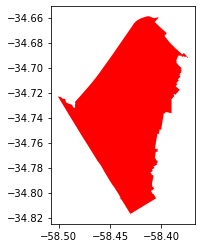

In [9]:
gdf_muni_dis_inter.plot(color='red')  

In [11]:
gdf_muni_dis_inter.to_file("./capas/area_de_estudio.shp")